In [27]:
import re
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import random
import math

In [28]:
%matplotlib inline

In [29]:
filepath = "/Users/hquos/Projects/DSV_libdm4/logs/02_CdmApp/imagesim/"
dir_content = glob.glob(filepath + "/*.*")
full_paths = [p.split("/") for p in dir_content]
files = [p.pop(-1) for p in full_paths]

In [30]:
def get_filename_components(filename):
    frase = r"(?<=imagesim_max_deitp_position_).+(?=_)"
    match = re.findall(frase, filename)
    algo, target, tools, opt = match[0].split("_")
    tools = tools.split("-")
    return algo, target, tools[0], tools[1], opt

In [31]:
def get_imagesim_values(filepath, filename):
    frame = []
    max_deltaE = []
    avg_deltaE = []
    position = []
    match1 = r"picture "
    match2 = r"(?<=AVG_DEITP = )\d+.\d+"
    match3 = r"(?<=MAX_DEITP = )\d+.\d+"
    match4 = r"(?<=position \D )\d+, \d+"
    
    read_log = open(filepath + filename)
    for txt_line in read_log:
        frame_found = re.findall(r"(?<={})\d+".format(match1), txt_line)
        avg_deltaE_found = re.findall(match2, txt_line)
        max_deltaE_found = re.findall(match3, txt_line)
        pixel_pos_found = re.findall(match4, txt_line)
        [frame.append(f) for f in frame_found if len(frame_found) > 0]
        [max_deltaE.append(maxd) for maxd in max_deltaE_found if len(max_deltaE_found) > 0]
        [avg_deltaE.append(avg) for avg in avg_deltaE_found if len(avg_deltaE_found) > 0]
        [position.append(ppos) for ppos in pixel_pos_found if len(pixel_pos_found) > 0]
    read_log.close()
    position = [p.split(", ") for p in position]
    return frame, max_deltaE, avg_deltaE, position

In [38]:
def max_error_pixel_coordinates(file, outpath):
    algo, target, tools1, tools2, opt = get_filename_components(file)
    frame, max_deltaE, avg_deltaE, position = get_imagesim_values(filepath, file)
    name = "_".join((tools1, tools2, algo, target, opt))
    index = ['Frame', 'x position', 'y position',
             'Delta ICTCP max', 'Delta ICTCP ave',
             'DM Algo', 'Target', 'opt']
    content = []
    for f in range(0, len(frame)-1, 1):
        temp = [frame[f], position[f][0], position[f][1], max_deltaE[f], avg_deltaE[f], algo, target, opt]
        content.append(temp)
        
    if len(frame) == len(max_deltaE) == len(avg_deltaE):
        print("Extracting ictcp values ...")
    else:
        print("Date extraction not possible! \n Please check log file format.")
    df = pd.DataFrame(list(np.array(content).T), index=index)
    df.to_csv(outpath+name+".csv")
    df.to_excel(outpath+name+".xlsx")
    return df

In [39]:
l_dict = {'t1': '100', 't27': '600', 't49': '1000'}

Extracting ictcp values ...


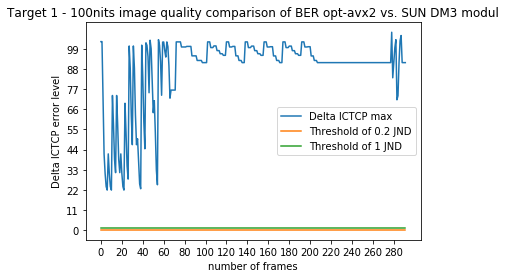

Extracting ictcp values ...


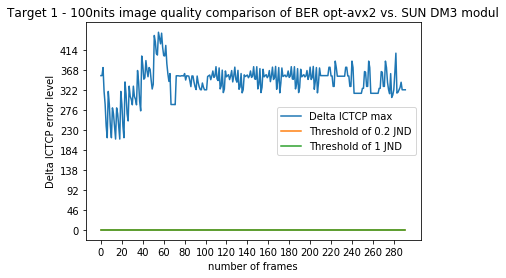

Extracting ictcp values ...


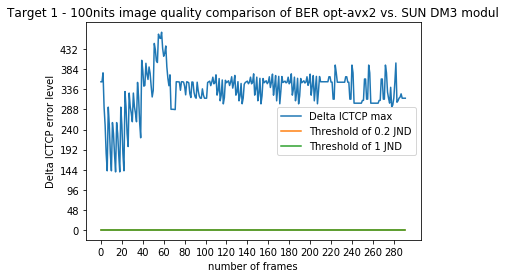

Extracting ictcp values ...


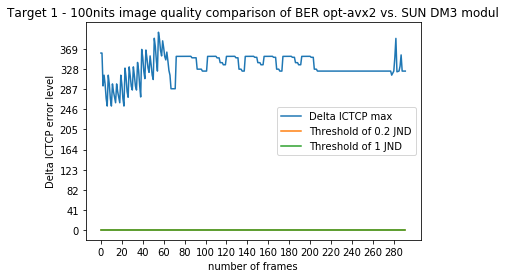

Extracting ictcp values ...


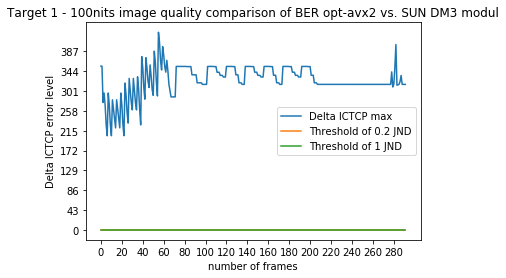

In [40]:
outpath = "/Users/hquos/Projects/DSV_libdm4/plots/"
for file in files:
    df = max_error_pixel_coordinates(file, outpath)
    nr_frame = len(df.columns)
    x = range(nr_frame)
    show_value = 'Delta ICTCP max'
    y = [float(y) for y in df.loc[show_value]]
    
    max_yticks = math.ceil(max(y))
    if max_yticks < 2:
        max_yticks = 2
    plt.plot(x, y, label = show_value)
    plt.plot(range(0,nr_frame), [0.2,]*nr_frame, label = 'Threshold of 0.2 JND')
    plt.plot(range(0,nr_frame), [1,]*nr_frame, label = 'Threshold of 1 JND')
    plt.yticks(range(0, max_yticks, math.ceil(max_yticks/10)))
    plt.xticks(range(0, nr_frame+1, 20))
    plt.xlabel('number of frames')
    plt.ylabel('Delta ICTCP error level')
    plt.title(f'Target {target[1:]} - {l_dict[target]}nits image quality comparison of {tools1} {opt} vs. {tools2} {str.upper(algo)} modul')
    plt.legend()
    plt.show()

In [ ]:
list(zip(frame, max_deltaE, avg_deltaE, position))